# Лабораторная 2

## AND and OR operators

**Stochastic gradient**

AND bipolar
[-1 -1]: -0.9882509001979394 -> -1
[-1  1]: -0.3456446492774024 -> -1
[ 1 -1]: -0.3660601754860083 -> -1
[1 1]: 0.27654607543452864 -> 1
WEIGHT bias: 0.3110953623559655  w1: 0.32130312546026846  w2:-0.35585241238170534


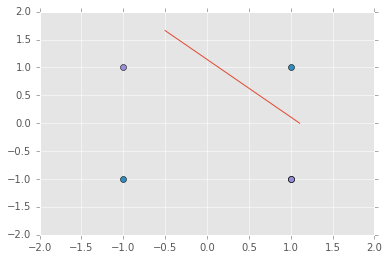

In [2]:
from random import choice
import numpy as np
import matplotlib.pyplot as plt


def step_neg(x):
    return -1 if x < 0 else 1


def step(x):
    return 0 if x < 0 else 1


training_data_or = [
    (np.array([0, 0, 1]), 0),
    (np.array([0, 1, 1]), 1),
    (np.array([1, 0, 1]), 1),
    (np.array([1, 1, 1]), 1),
]

training_data_and = [
    (np.array([0, 0, 1]), 0),
    (np.array([0, 1, 1]), 0),
    (np.array([1, 0, 1]), 0),
    (np.array([1, 1, 1]), 1),
]

input = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]
                  ])

input_neg = np.array([[-1, -1],
                      [-1, 1],
                      [1, -1],
                      [1, 1]
                      ])

training_data_and_neg = [
    (np.array([-1, -1, 1]), -1),
    (np.array([-1, 1, 1]), -1),
    (np.array([1, -1, 1]), -1),
    (np.array([1, 1, 1]), 1),
]


def calc(training_data, func_act, bipolar):
    w = np.random.rand(3)
    errors = []
    eta = 0.1
    n = 1000

    for i in range(n):
        x, expected = choice(training_data)
        result = np.dot(w, x)
        error = expected - func_act(result)
        errors.append(error)
        w += eta * error * x

    for x, _ in training_data:
        result = np.dot(x, w)
        print("{}: {} -> {}".format(x[:2], result, func_act(result)))
    print("WEIGHT bias: {}  w1: {}  w2:{}".format(w[0], w[1], w[2]))

    w2, w1, b = w
    x = -b / w1
    y = -b / w2

    d = y
    c = -y / x

    plt.style.use('ggplot')

    if (bipolar):
        line_x_coords = np.array([-0.5, x])
        line_y_coords = c * line_x_coords + d
        plt.plot(line_x_coords, line_y_coords)
        plt.plot(input_neg[1:], input_neg[:-1], 'o')
        plt.axis([-2, 2, -2, 2])
    else:
        line_x_coords = np.array([-1, x])
        line_y_coords = c * line_x_coords + d
        plt.plot(line_x_coords, line_y_coords)
        plt.plot(input[1:], input[:-1], 'o')
        plt.axis([-1, 2, -1, 2])

    plt.show()


print('AND bipolar')
calc(training_data_and_neg, step_neg, True)

AND binar
[0 0]: -0.38495801481741576 -> 0
[0 1]: -0.2760762674965218 -> 0
[1 0]: -0.04882785124944755 -> 0
[1 1]: 0.0600538960714464 -> 1
WEIGHT bias: 0.3361301635679682  w1: 0.10888174732089395  w2:-0.38495801481741576


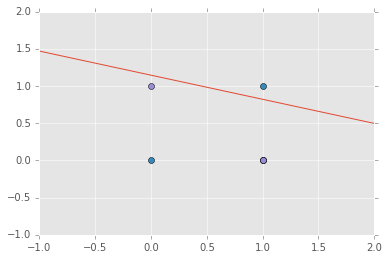

In [3]:
print('AND binar')
calc(training_data_and, step, False)

OR
[0 0]: -0.09561310530691247 -> 0
[0 1]: 0.6749723813965854 -> 1
[1 0]: 0.2678636916077394 -> 1
[1 1]: 1.0384491783112373 -> 1
WEIGHT bias: 0.36347679691465185  w1: 0.7705854867034979  w2:-0.09561310530691247


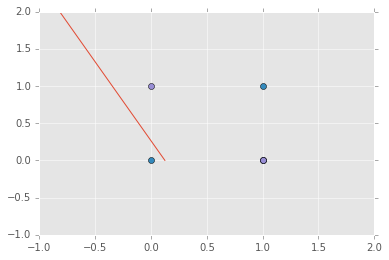

In [6]:
print('OR')
calc(training_data_or, step, False)

## XOR
**Using Back Propagation**

Network scheme like 2-3-1 and like 2-2-1

In [8]:
import numpy as np


def leanr_xor(scheme, epochs):
    epochs = 20000  # Number of iterations
    inputLayerSize, hiddenLayerSize, outputLayerSize = scheme
    L = 0.1  # learning rate

    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([[0], [1], [1], [0]])

    def sigmoid(x): return 1 / (1 + np.exp(-x))  # activation function

    def sigmoid_(x): return x * (1 - x)  # derivative of sigmoid

    # weights on layer inputs
    Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
    Wz = np.random.uniform(size=(hiddenLayerSize, outputLayerSize))

    for _ in range(epochs):
        H = sigmoid(np.dot(X, Wh))  # hidden layer results
        Z = np.dot(H, Wz)  # output layer, no activation
        E = Y - Z  # error
        dZ = E * L  # delta Z
        Wz += H.T.dot(dZ)  # update output layer weights
        dH = dZ.dot(Wz.T) * sigmoid_(H)  # delta H
        Wh += X.T.dot(dH)  # update hidden layer weights

    print('Hidden layer: \n' + str(Wh))
    print('Output layer: \n' + str(Wz))

    print('Z: \n' + str(Z))

    
    
print('\nScheme 2-2-1')
leanr_xor([2, 2, 1], 20000)

print('Scheme 2-3-1')
leanr_xor([2, 3, 1], 20000)

print('\nScheme 2-4-1')
leanr_xor([2, 4, 1], 20000)


Scheme 2-2-1
Hidden layer: 
[[1.83451741 5.85000483]
 [1.83450342 5.84941996]]
Output layer: 
[[-8.42585288]
 [ 8.27711522]]
Z: 
[[-0.0743699 ]
 [ 0.98774165]
 [ 0.98774152]
 [ 0.06072315]]
Scheme 2-3-1
Hidden layer: 
[[4.21068223 0.38908528 4.37704835]
 [0.38793089 4.2105673  4.3852753 ]]
Output layer: 
[[-2.63763891]
 [-2.64088487]
 [ 5.23776355]]
Z: 
[[-0.02038067]
 [ 0.99957005]
 [ 0.99957033]
 [ 0.01099633]]

Scheme 2-4-1
Hidden layer: 
[[ 1.00685178 -0.60410757  0.47946811  4.20647418]
 [ 0.5488341  -0.78215806  1.10835967  4.20587268]]
Output layer: 
[[-3.80447308]
 [ 1.33632657]
 [-2.39934092]
 [ 4.86748743]]
Z: 
[[3.55271368e-15]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.15463195e-14]]


**How it works:**
Input + hidden layer

![image](https://i.imgur.com/1xoWvw0.png)